# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Hanafi Husnipradja
- **Email:** hanafipradja01@gmail.com
- **ID Dicoding:** hanafipradja

## Menentukan Pertanyaan Bisnis

- Bagaimana performa peminjaman sepeda tiap bulannya? 
- Bagaimana performa peminjaman sepeda tiap musimnya?
- Bagaimana perbandingan peminjaman sepeda ketika weekend/holiday dan weekday?
- Pada waktu kapankah yang menunjukkan paling banyak peminjaman dan paling sedikit peminjaman?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Data Wrangling

### Gathering Data

In [2]:
# Memuat tabel day
day_df = pd.read_csv('data/day.csv')
day_df.head(5) 

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Memuat tabel hour
hour_df = pd.read_csv('data/hour.csv')
hour_df.head(-5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17369,17370,2012-12-31,1,1,12,14,0,1,1,2,0.28,0.2727,0.45,0.2239,62,185,247
17370,17371,2012-12-31,1,1,12,15,0,1,1,2,0.28,0.2879,0.45,0.1343,69,246,315
17371,17372,2012-12-31,1,1,12,16,0,1,1,2,0.26,0.2576,0.48,0.1940,30,184,214
17372,17373,2012-12-31,1,1,12,17,0,1,1,2,0.26,0.2879,0.48,0.0896,14,150,164


### Assessing Data

#### Assessing data from day.csv

In [4]:
# Mencari informasi mengenai data
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dapat diperhatikan bahwa ada ketidakakuratan dalam tipe data yang digunakan.<br>
Seharusnya kolom dteday bukan **object** melainkan **datetime**,<br>
dan seharusnya untuk tahun pada kolom yr tidak diwakili oleh nilai kategori seperti 0 dan 1<br>
melainkan harus disebutkan secara explicit tahunnya.<br>
Begitupun untuk kolom season dan weather yang dibuat sebagai data ordinal<br>
yang seharusnya merupakan data nominal.<br>

Adapun menurut pengamatan saya, sebaiknya kolom weekday dapat diperjelas dengan diisi dengan nama hari<br>
dimulai dari minggu - sabtu (menggantikan 0-6) dan mengganti beberapa notasi 0 dan 1 pada kolom<br>
holiday dan workingday dengan boolean False dan True.

In [5]:
# mencari nilai yang hilang (missing value)
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak terdapat missing value pada data day.csv

In [6]:
# Mengidentifikasi banyaknya duplikasi pada data day.csv
print('Jumlah duplikasi: {}'.format(day_df.duplicated().sum()))

Jumlah duplikasi: 0


Tidak terdapat duplikasi pada data day.csv, hooray!

In [7]:
# Memeriksa rangkuman parameter statistik dari data day.csv
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Assessing data from hour.csv

In [8]:
# Mencari informasi mengenai data hour.csv
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Sama seperti day.csv, kolom beberapa kolom perlu diperbaiki tipe data nya.

In [9]:
# memeriksa apakah ada missing value pada data hour.csv
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak terdapat missing value pada data hour.csv

In [10]:
# Mengidentifikasi duplikasi nilai pada data hour.csv
print("Jumlah Duplikasi: {}".format(hour_df.duplicated().sum()))

Jumlah Duplikasi: 0


Tidak terdapat duplikasi nilai pada data hour.csv

In [11]:
# Memeriksa rangkuman parameter statistik dari data hour.csv
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### Cleaning day.csv data

In [12]:
# Memperbaiki innacurate data type pada kolom dteday
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Memperbaiki innacurate value pada kolom yr
mapping = {0: '2011', 1: '2012'}
day_df['yr'] = day_df['yr'].map(mapping)
day_df['yr'] = pd.to_datetime(day_df['yr']).dt.strftime('%Y')

# Memperbaiki innacurate value pada kolom season
mapping = {1:'winter', 2:'spring', 3:'summer', 4:'fall'}
day_df['season'] = day_df['season'].map(mapping)

# Memperbaiki innacurate value pada kolom weathersit
mapping = {1: 'Clear, Partly cloudy',
           2: 'Mist, Mist + Cloudy',
           3: 'Light Snow/Rain',
           4: 'Heavy Rain/Snow'
           }
day_df['weathersit'] = day_df['weathersit'].map(mapping)

# Memperbaiki innacurate value pada kolom weekday
mapping = {0:'sunday', 
           1:'monday', 
           2:'tuesday',
           3:'wednesday',
           4:'thursday',
           5:'friday',
           6:'saturday'}
day_df['weekday'] = day_df['weekday'].map(mapping)

# Memperbaiki innacurate value pada kolom holiday dan workingday
column_need_to_fix = ['holiday', 'workingday']
mapping = {0:False, 1:True}
for column in column_need_to_fix:
    day_df[column] = day_df[column].map(mapping)


day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    object        
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    bool          
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    bool          
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: bool(2), datetime64[ns]

In [13]:
# Memeriksa apakah kolom yr sudah berubah
day_df.head(-5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,2011,1,False,saturday,False,"Mist, Mist + Cloudy",0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,winter,2011,1,False,sunday,False,"Mist, Mist + Cloudy",0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,winter,2011,1,False,monday,True,"Clear, Partly cloudy",0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,winter,2011,1,False,tuesday,True,"Clear, Partly cloudy",0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,winter,2011,1,False,wednesday,True,"Clear, Partly cloudy",0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,722,2012-12-22,winter,2012,12,False,saturday,False,"Clear, Partly cloudy",0.265833,0.236113,0.441250,0.407346,205,1544,1749
722,723,2012-12-23,winter,2012,12,False,sunday,False,"Clear, Partly cloudy",0.245833,0.259471,0.515417,0.133083,408,1379,1787
723,724,2012-12-24,winter,2012,12,False,monday,True,"Mist, Mist + Cloudy",0.231304,0.258900,0.791304,0.077230,174,746,920
724,725,2012-12-25,winter,2012,12,True,tuesday,False,"Mist, Mist + Cloudy",0.291304,0.294465,0.734783,0.168726,440,573,1013


#### Cleaning hour.csv data

In [14]:
# Memperbaiki innacurate data type pada kolom dteday
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Memperbaiki innacurate value pada kolom yr
mapping = {0: '2011', 1: '2012'}
hour_df['yr'] = hour_df['yr'].map(mapping)
hour_df['yr'] = pd.to_datetime(hour_df['yr']).dt.strftime('%Y')

# Memperbaiki innacurate value pada kolom season
mapping = {1:'winter', 2:'spring', 3:'summer', 4:'fall'}
hour_df['season'] = hour_df['season'].map(mapping)

# Memperbaiki innacurate value pada kolom weathersit
mapping = {1: 'Clear, Partly cloudy',
           2: 'Mist, Mist + Cloudy',
           3: 'Light Snow/Rain',
           4: 'Heavy Rain/Snow'
           }
hour_df['weathersit'] = hour_df['weathersit'].map(mapping)

# Memperbaiki innacurate value pada kolom weekday
mapping = {0:'sunday', 
           1:'monday', 
           2:'tuesday',
           3:'wednesday',
           4:'thursday',
           5:'friday',
           6:'saturday'}
hour_df['weekday'] = hour_df['weekday'].map(mapping)

# Memperbaiki innacurate value pada kolom holiday dan workingday
column_need_to_fix = ['holiday', 'workingday']
mapping = {0:False, 1:True}
for column in column_need_to_fix:
    hour_df[column] = hour_df[column].map(mapping)


hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  object        
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  bool          
 7   weekday     17379 non-null  object        
 8   workingday  17379 non-null  bool          
 9   weathersit  17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [15]:
# Memeriksa apakah kolom yr sudah berubah
hour_df.head(-5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,2011,1,0,False,saturday,False,"Clear, Partly cloudy",0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,winter,2011,1,1,False,saturday,False,"Clear, Partly cloudy",0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,winter,2011,1,2,False,saturday,False,"Clear, Partly cloudy",0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,winter,2011,1,3,False,saturday,False,"Clear, Partly cloudy",0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,winter,2011,1,4,False,saturday,False,"Clear, Partly cloudy",0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17369,17370,2012-12-31,winter,2012,12,14,False,monday,True,"Mist, Mist + Cloudy",0.28,0.2727,0.45,0.2239,62,185,247
17370,17371,2012-12-31,winter,2012,12,15,False,monday,True,"Mist, Mist + Cloudy",0.28,0.2879,0.45,0.1343,69,246,315
17371,17372,2012-12-31,winter,2012,12,16,False,monday,True,"Mist, Mist + Cloudy",0.26,0.2576,0.48,0.1940,30,184,214
17372,17373,2012-12-31,winter,2012,12,17,False,monday,True,"Mist, Mist + Cloudy",0.26,0.2879,0.48,0.0896,14,150,164


## Exploratory Data Analysis (EDA)

### Explore Data from hour.csv
Alasan: Setelah diamati lebih lanjut, jelas bahwa perbedaan day.csv dan hour.csv yaitu pada hour.csv terdapat kolom hour sedangkan pada day.csv tidak. Sehingga diputuskan bahwa eksplorasi data sampai taham visualisasi dan explanatory akan menggunakan data dari hour.csv

In [16]:
# memeriksa parameter statistik dari data hour.csv
hour_df.describe(include='all')

C:\Users\Hanafi\AppData\Local\Temp\ipykernel_12448\2526910424.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include='all')


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379,17379.000000,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,2,NaN,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,summer,2012,NaN,NaN,False,saturday,True,"Clear, Partly cloudy",NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,8734,NaN,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,NaN,6.537775,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,NaN,3.438776,6.914405,NaN,NaN,NaN,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,NaN,4.000000,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


In [17]:
# membuka kembali data frame
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,2011,1,0,False,saturday,False,"Clear, Partly cloudy",0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,winter,2011,1,1,False,saturday,False,"Clear, Partly cloudy",0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,winter,2011,1,2,False,saturday,False,"Clear, Partly cloudy",0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,winter,2011,1,3,False,saturday,False,"Clear, Partly cloudy",0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,winter,2011,1,4,False,saturday,False,"Clear, Partly cloudy",0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,winter,2012,12,19,False,monday,True,"Mist, Mist + Cloudy",0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,winter,2012,12,20,False,monday,True,"Mist, Mist + Cloudy",0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,winter,2012,12,21,False,monday,True,"Clear, Partly cloudy",0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,winter,2012,12,22,False,monday,True,"Clear, Partly cloudy",0.26,0.2727,0.56,0.1343,13,48,61


In [18]:
# memeriksa demografi peminjam sepeda tiap tahunnya berdasarkan tipe peminjam (registered or casual)
hour_df.groupby(by='yr').agg({
    'casual':'sum',
    'registered':'sum',
    'cnt':'sum'
})

,casual,registered,cnt
yr,,,
2011,247252,995851,1243103
2012,372765,1676811,2049576


In [19]:
# memeriksa banyaknya peminjaman sepeda setiap jam nya pada 2011
hour_df[hour_df['yr']=='2011'].groupby(by='hr').cnt.sum()

hr
0      15540
1       9558
2       6661
3       3441
4       1817
5       5157
6      20801
7      56930
8      95467
9      59486
10     47511
11     56598
12     69198
13     69339
14     66482
15     68590
16     85622
17    127632
18    116985
19     85802
20     62818
21     48875
22     37677
23     25116
Name: cnt, dtype: int64

In [20]:
# memeriksa banyaknya peminjaman sepeda setiap jam nya pada 2012
hour_df[hour_df['yr']=='2012'].groupby(by='hr').cnt.sum()

hr
0      23590
1      14606
2       9691
3       4733
4       2611
5       9104
6      34331
7      97241
8     165534
9      99952
10     78746
11     94722
12    115216
13    115580
14    109170
15    114559
16    142126
17    209228
18    192787
19    140987
20    101732
21     76570
22     57935
23     38825
Name: cnt, dtype: int64

In [21]:
# memeriksa banyaknya peminjam sepeda pada pagi, siang, sore dan malam (periode waktu)
hour_df['timeperiod'] = hour_df.hr.apply(lambda x: "evening" if 19 <= x <= 23 or 0 <= x <= 3 else \
                                         ('morning' if 4 <= x <= 10 else \
                                          'noon' if 11 <= x <= 14 else 'afternoon'))

hour_df.groupby(by='timeperiod').cnt.sum().sort_values(ascending=False)

timeperiod
afternoon    1057529
morning       774688
evening       764157
noon          696305
Name: cnt, dtype: int64

In [22]:
# memeriksa apakah kolom time period berhasil masuk ke dataframe
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,timeperiod
0,1,2011-01-01,winter,2011,1,0,False,saturday,False,"Clear, Partly cloudy",0.24,0.2879,0.81,0.0000,3,13,16,evening
1,2,2011-01-01,winter,2011,1,1,False,saturday,False,"Clear, Partly cloudy",0.22,0.2727,0.80,0.0000,8,32,40,evening
2,3,2011-01-01,winter,2011,1,2,False,saturday,False,"Clear, Partly cloudy",0.22,0.2727,0.80,0.0000,5,27,32,evening
3,4,2011-01-01,winter,2011,1,3,False,saturday,False,"Clear, Partly cloudy",0.24,0.2879,0.75,0.0000,3,10,13,evening
4,5,2011-01-01,winter,2011,1,4,False,saturday,False,"Clear, Partly cloudy",0.24,0.2879,0.75,0.0000,0,1,1,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,winter,2012,12,19,False,monday,True,"Mist, Mist + Cloudy",0.26,0.2576,0.60,0.1642,11,108,119,evening
17375,17376,2012-12-31,winter,2012,12,20,False,monday,True,"Mist, Mist + Cloudy",0.26,0.2576,0.60,0.1642,8,81,89,evening
17376,17377,2012-12-31,winter,2012,12,21,False,monday,True,"Clear, Partly cloudy",0.26,0.2576,0.60,0.1642,7,83,90,evening
17377,17378,2012-12-31,winter,2012,12,22,False,monday,True,"Clear, Partly cloudy",0.26,0.2727,0.56,0.1343,13,48,61,evening


In [23]:
# memeriksa peminjam sepeda ketika libur dan tidak libur
hour_df.groupby(by='workingday').agg({
    'casual':'sum',
    'registered':'sum',
    'cnt':'sum',
})

,casual,registered,cnt
workingday,,,
False,316732,683537,1000269
True,303285,1989125,2292410


In [24]:
# memeriksa banyaknya peminjaman sepeda setiap bulannya selama 2011
hour_df[hour_df['yr']=='2011'].groupby(by='mnth').agg({
    'casual':'sum',
    'registered':'sum',
    'cnt':'sum',
})

,casual,registered,cnt
mnth,,,
1,3073,35116,38189
2,6242,41973,48215
3,12826,51219,64045
4,22346,72524,94870
5,31050,104771,135821
6,30612,112900,143512
7,36452,104889,141341
8,28842,107849,136691
9,26545,100873,127418


In [25]:
# memeriksa banyaknya peminjaman sepeda setiap bulannya selama 2012
hour_df[hour_df['yr']=='2012'].groupby(by='mnth').agg({
    'casual':'sum',
    'registered':'sum',
    'cnt':'sum',
})

,casual,registered,cnt
mnth,,,
1,8969,87775,96744
2,8721,94416,103137
3,31618,133257,164875
4,38456,135768,174224
5,44235,151630,195865
6,43294,159536,202830
7,41705,161902,203607
8,43197,171306,214503
9,43778,174795,218573


In [26]:
# memeriksa banyaknya peminjaman sepeda tiap musim selama 2011
hour_df[hour_df['yr']=='2011'].groupby(['season', 'timeperiod']).agg({
    'casual':'sum',
    'registered':'sum',
    'cnt':'sum',
})

casual  registered     cnt
season timeperiod                            
fall   afternoon    17833       87006  104839
       evening       9315       62180   71495
       morning       7343       71242   78585
       noon         18322       52896   71218
spring afternoon    25952       87530  113482
       evening      17075       67028   84103
       morning      10980       65716   76696
       noon         23557       49478   73035
summer afternoon    29865      102344  132209
       evening      24862       84436  109298
       morning      13851       81252   95103
       noon         26872       56168   83040
winter afternoon     7491       40808   48299
       evening       3120       27472   30592
       morning       2728       34057   36785
       noon          8086       26238   34324

In [27]:
# memeriksa banyaknya peminjaman sepeda tiap musim selama 2012
hour_df[hour_df['yr']=='2012'].groupby(['season', 'timeperiod']).agg({
    'casual':'sum',
    'registered':'sum',
    'cnt':'sum',
})

casual  registered     cnt
season timeperiod                            
fall   afternoon    26621      140948  167569
       evening      11259       95600  106859
       morning      10319      116383  126702
       noon         28770       85576  114346
spring afternoon    43520      142583  186103
       evening      24983      107311  132294
       morning      16572      114577  131149
       noon         40883       80844  121727
summer afternoon    41719      159701  201420
       evening      30322      130417  160739
       morning      18278      131589  149867
       noon         40322       89131  129453
winter afternoon    14155       89453  103608
       evening       6171       62606   68777
       morning       4877       74924   79801
       noon         13994       55168   69162

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa peminjaman sepeda tiap bulannya? 

In [28]:
# Melakukan resampling dari data harian ke bulanan (2011)
monthly_rent_df_2011 = hour_df[hour_df['yr']=='2011'].resample(rule='M', on='dteday').agg({
    'casual':'sum',
    'registered':'sum',
    'cnt':'sum'
})

monthly_rent_df_2011.index = monthly_rent_df_2011.index.strftime('%Y-%m')
monthly_rent_df_2011 = monthly_rent_df_2011.reset_index()
monthly_rent_df_2011.rename(columns={
    "cnt":"total"
}, inplace=True)

# Melakukan resampling dari data harian ke bulanan (2012)
monthly_rent_df_2012 = hour_df[hour_df['yr']=='2012'].resample(rule='M', on='dteday').agg({
    'casual':'sum',
    'registered':'sum',
    'cnt':'sum'
})

monthly_rent_df_2012.index = monthly_rent_df_2012.index.strftime('%Y-%m')
monthly_rent_df_2012 = monthly_rent_df_2012.reset_index()
monthly_rent_df_2012.rename(columns={
    "cnt":"total"
}, inplace=True)


In [29]:
# hasil resampling
monthly_rent_df_2011

,dteday,casual,registered,total
0,2011-01,3073,35116,38189
1,2011-02,6242,41973,48215
2,2011-03,12826,51219,64045
3,2011-04,22346,72524,94870
4,2011-05,31050,104771,135821
5,2011-06,30612,112900,143512
6,2011-07,36452,104889,141341
7,2011-08,28842,107849,136691
8,2011-09,26545,100873,127418
9,2011-10,25222,98289,123511


In [30]:
# hasil resampling data 2012
monthly_rent_df_2012

,dteday,casual,registered,total
0,2012-01,8969,87775,96744
1,2012-02,8721,94416,103137
2,2012-03,31618,133257,164875
3,2012-04,38456,135768,174224
4,2012-05,44235,151630,195865
5,2012-06,43294,159536,202830
6,2012-07,41705,161902,203607
7,2012-08,43197,171306,214503
8,2012-09,43778,174795,218573
9,2012-10,34538,164303,198841


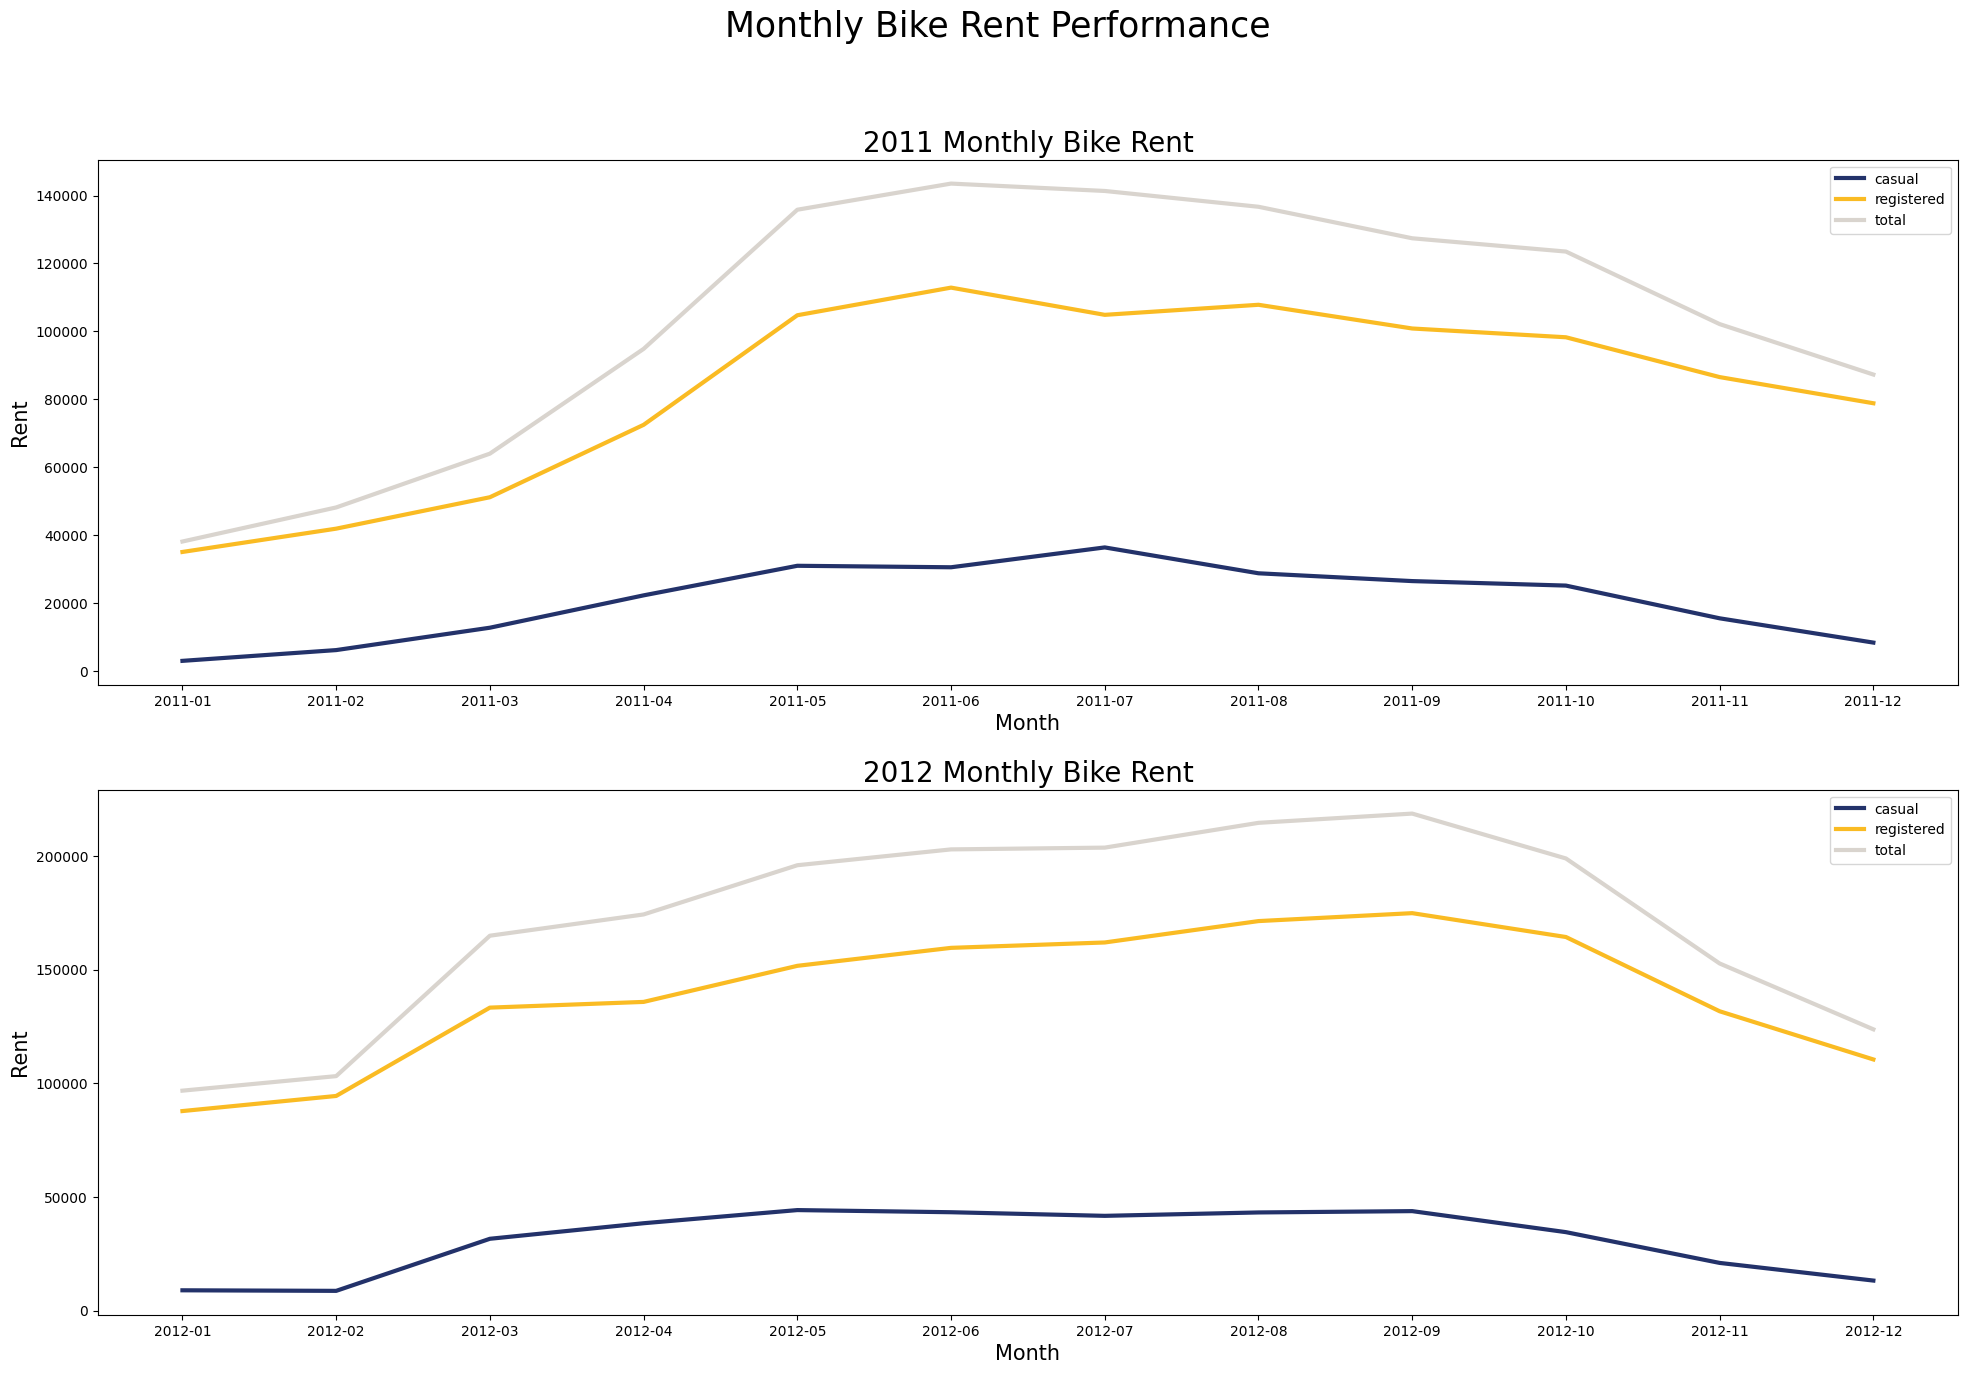

In [31]:
# Data Visualization
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(24, 15))

ax[0].plot(monthly_rent_df_2011['dteday'], monthly_rent_df_2011['casual'], label='casual', color='#23326A', linewidth=3)
ax[0].plot(monthly_rent_df_2011['dteday'], monthly_rent_df_2011['registered'], label='registered', color='#FABB23', linewidth=3)
ax[0].plot(monthly_rent_df_2011['dteday'], monthly_rent_df_2011['total'], label='total', color='#D9D4CE', linewidth=3)
ax[0].set_title('2011 Monthly Bike Rent', size=20)
ax[0].set_xlabel('Month',size=15)
ax[0].set_ylabel('Rent',size=15)
ax[0].legend()

ax[1].plot(monthly_rent_df_2012['dteday'], monthly_rent_df_2012['casual'], label='casual', color='#23326A', linewidth=3)
ax[1].plot(monthly_rent_df_2012['dteday'], monthly_rent_df_2012['registered'], label='registered', color='#FABB23', linewidth=3)
ax[1].plot(monthly_rent_df_2012['dteday'], monthly_rent_df_2012['total'], label='total', color='#D9D4CE', linewidth=3)
ax[1].set_title('2012 Monthly Bike Rent', size=20)
ax[1].set_xlabel('Month',size=15)
ax[1].set_ylabel('Rent',size=15)
ax[1].legend()

plt.suptitle('Monthly Bike Rent Performance', size=25)
plt.show()

### Pertanyaan 2: Bagaimana performa peminjaman sepeda tiap musimnya?

In [32]:
# mengidentifikasi banyaknya peminjaman setiap musim nya pada taun 2011 dan 2012
season_rent_df_2011 = hour_df[hour_df['yr']=='2011'].groupby(by='season').cnt.sum().sort_values(ascending=False).reset_index()

season_rent_df_2012 = hour_df[hour_df['yr']=='2012'].groupby(by='season').cnt.sum().sort_values(ascending=False).reset_index()


C:\Users\Hanafi\AppData\Local\Temp\ipykernel_12448\2062749296.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="cnt", y="season", data=season_rent_df_2011, palette=colors, ax=ax[0])
C:\Users\Hanafi\AppData\Local\Temp\ipykernel_12448\2062749296.py:6: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x="cnt", y="season", data=season_rent_df_2011, palette=colors, ax=ax[0])
C:\Users\Hanafi\AppData\Local\Temp\ipykernel_12448\2062749296.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="cnt", y="season", data=season_rent_df_2012, palette=colors, ax=ax[1])
C:\Users\Hanafi\AppData\Local\Temp\ipykernel_12448\2062749296.py:12: UserW

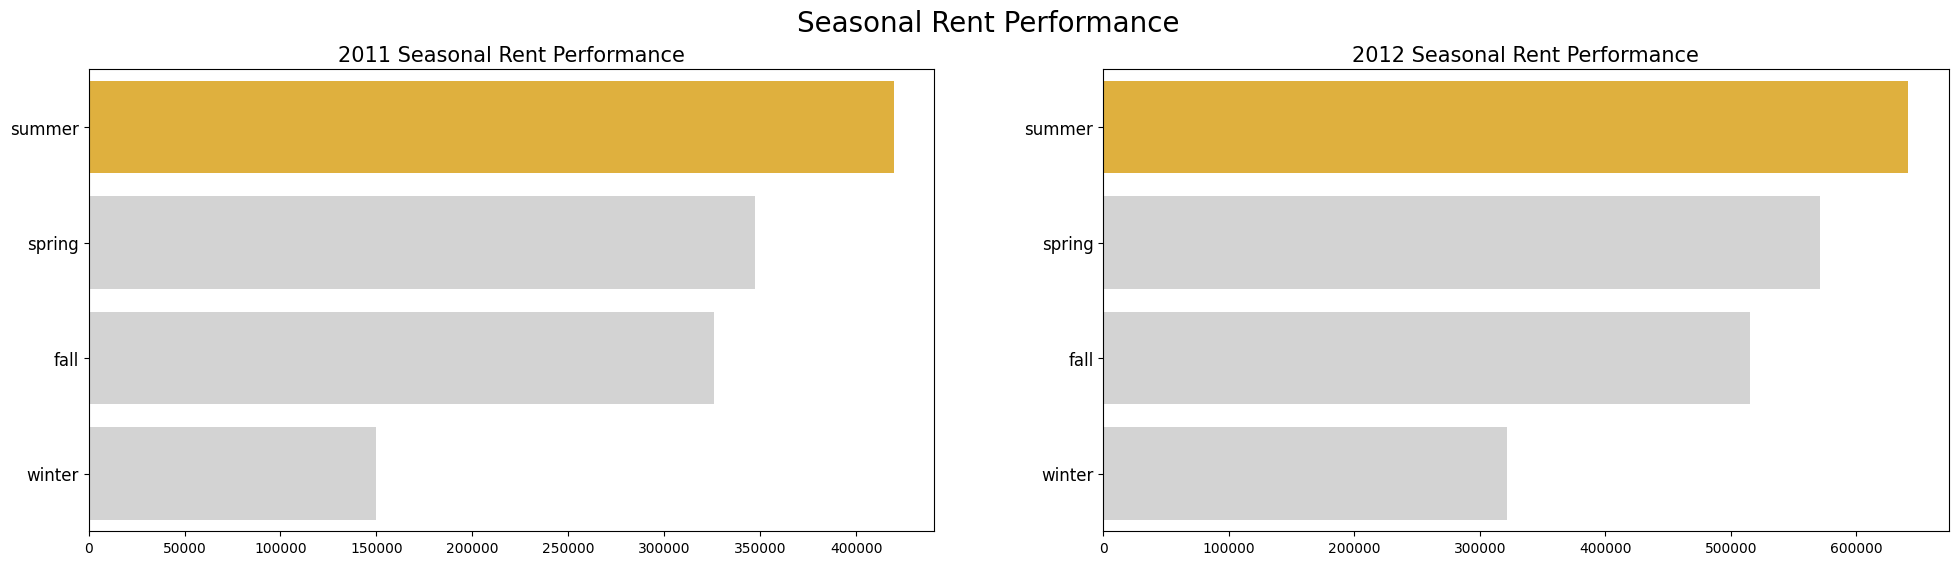

In [33]:
# Data visualisasi untuk setiap musimnya tahun 2011 dan 2012
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#FABB23", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="cnt", y="season", data=season_rent_df_2011, palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("2011 Seasonal Rent Performance", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="cnt", y="season", data=season_rent_df_2012, palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("2012 Seasonal Rent Performance", loc="center", fontsize=15)
ax[1].tick_params(axis ='y', labelsize=12)

plt.suptitle("Seasonal Rent Performance", fontsize=20)
plt.show()

### Pertanyaan 3: Bagaimana perbandingan peminjaman sepeda ketika weekend/holiday dan weekday?

In [34]:
# mengidentifikasi peminjaman sepeda ketika libur dan tidak libur 2011 dan 2012
daily_rent_df_2011 = hour_df[hour_df['yr']=='2011'].groupby(by='workingday').agg({
    'casual':'sum',
    'registered':'sum',
    'cnt':'sum',
}).sort_values(by='workingday').reset_index()

daily_rent_df_2012 = hour_df[hour_df['yr']=='2012'].groupby(by='workingday').agg({
    'casual':'sum',
    'registered':'sum',
    'cnt':'sum',
}).sort_values(by='workingday').reset_index()

daily_rent_df_2012

,workingday,casual,registered,cnt
0,False,187834,425596,613430
1,True,184931,1251215,1436146


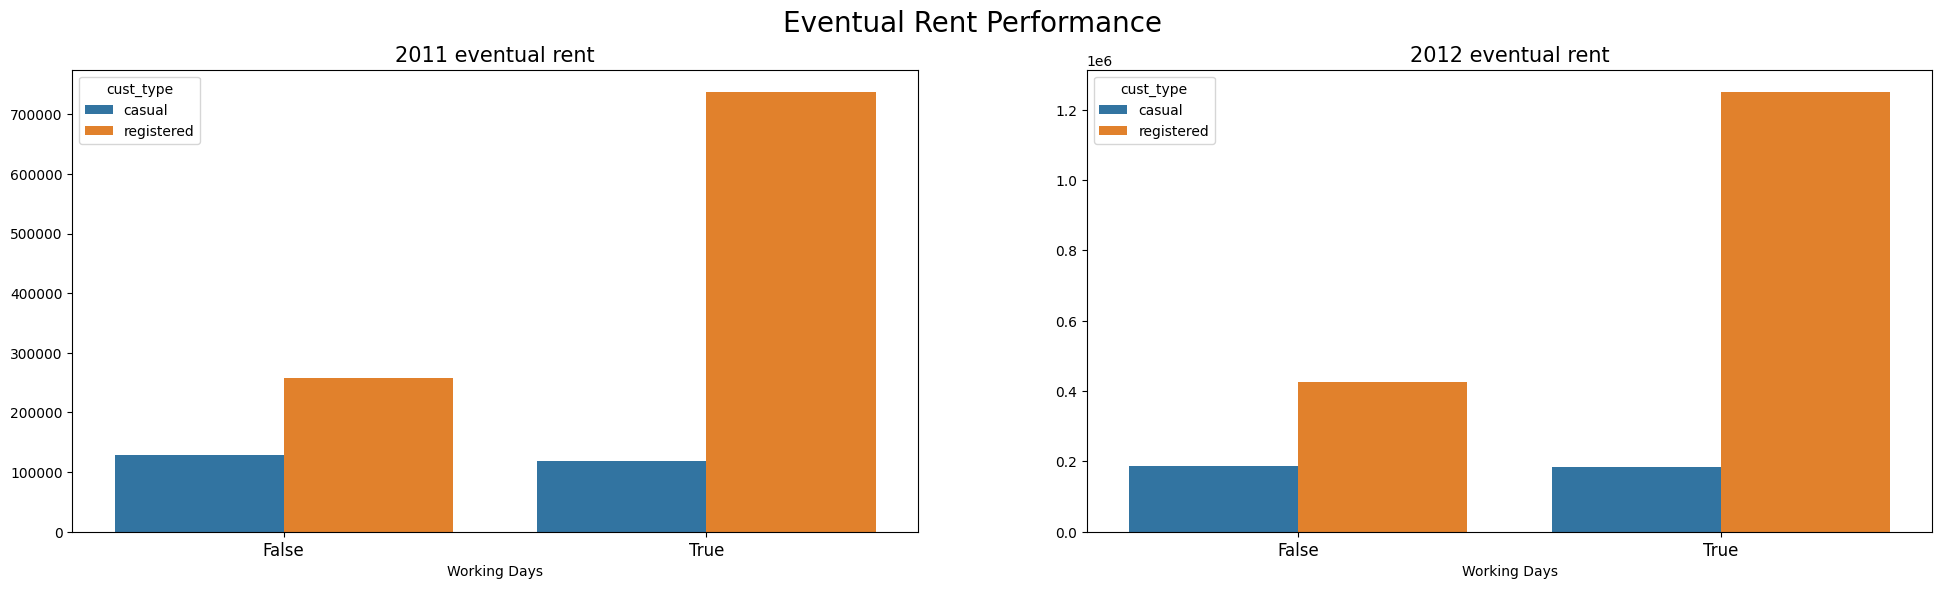

In [35]:
melted_df_daily_2011 = pd.melt(daily_rent_df_2011, id_vars=['workingday'], value_vars=['casual', 'registered'], var_name='cust_type', value_name='rent')
melted_df_daily_2012 = pd.melt(daily_rent_df_2012, id_vars=['workingday'], value_vars=['casual', 'registered'], var_name='cust_type', value_name='rent')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

sns.barplot(x="workingday", y="rent", data=melted_df_daily_2011, hue='cust_type', ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel('Working Days')
ax[0].set_title("2011 eventual rent", loc="center", fontsize=15)
ax[0].tick_params(axis ='x', labelsize=12)

sns.barplot(x="workingday", y="rent", data=melted_df_daily_2012, hue='cust_type', ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel('Working Days')
ax[1].set_title("2012 eventual rent", loc="center", fontsize=15)
ax[1].tick_params(axis ='x', labelsize=12)

plt.suptitle("Eventual Rent Performance", fontsize=20)
plt.show()

### Pertanyaan 4: Pada waktu kapankah yang menunjukkan paling banyak peminjaman dan paling sedikit peminjaman?

In [45]:
# Mengidentifikasi waktu paling banyak dan sedikit peminjaman 2011
hourly_rent_df_2011 = hour_df[hour_df['yr']=='2011'].groupby(by='timeperiod').cnt.sum().sort_values(ascending=False).reset_index()
hourly_rent_df_2012 = hour_df[hour_df['yr']=='2012'].groupby(by='timeperiod').cnt.sum().sort_values(ascending=False).reset_index()

In [46]:
hourly_rent_df_2011

,timeperiod,cnt
0,afternoon,398829
1,evening,295488
2,morning,287169
3,noon,261617


C:\Users\Hanafi\AppData\Local\Temp\ipykernel_12448\3653584528.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="cnt", y="timeperiod", data=hourly_rent_df_2011.head(5), palette=colors, ax=ax[0])
C:\Users\Hanafi\AppData\Local\Temp\ipykernel_12448\3653584528.py:6: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x="cnt", y="timeperiod", data=hourly_rent_df_2011.head(5), palette=colors, ax=ax[0])
C:\Users\Hanafi\AppData\Local\Temp\ipykernel_12448\3653584528.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="cnt", y="timeperiod", data=hourly_rent_df_2011.sort_values(by="cnt", ascending=True).head(5), palette=colors, ax=ax[1])


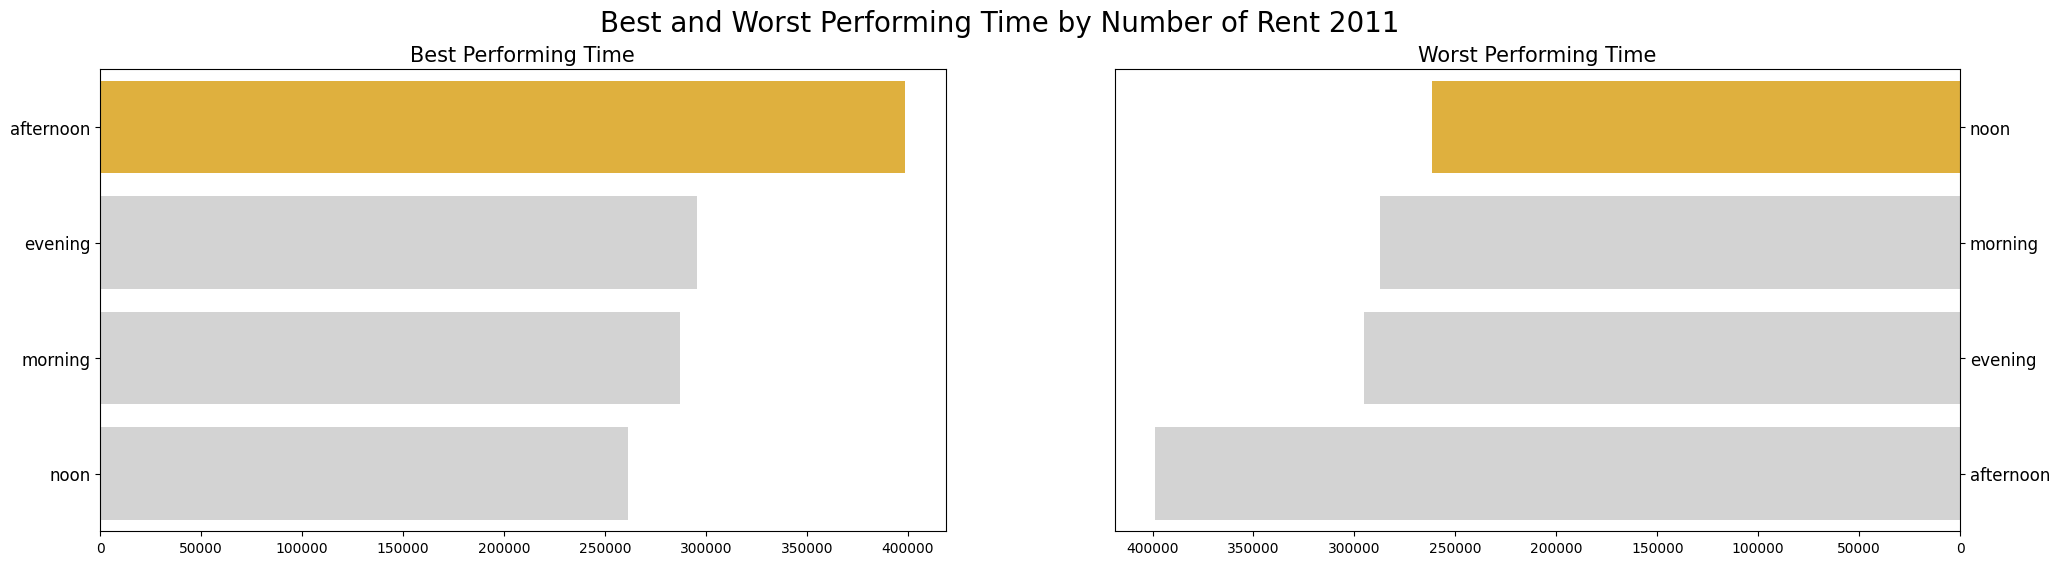

In [47]:
# Visualisasi data (2011)
colors = ["#FABB23", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

fix, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

sns.barplot(x="cnt", y="timeperiod", data=hourly_rent_df_2011.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Time", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="cnt", y="timeperiod", data=hourly_rent_df_2011.sort_values(by="cnt", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Time", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Time by Number of Rent 2011", fontsize=20)
plt.show()

C:\Users\Hanafi\AppData\Local\Temp\ipykernel_12448\572519482.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="cnt", y="timeperiod", data=hourly_rent_df_2012.head(5), palette=colors, ax=ax[0])
C:\Users\Hanafi\AppData\Local\Temp\ipykernel_12448\572519482.py:6: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x="cnt", y="timeperiod", data=hourly_rent_df_2012.head(5), palette=colors, ax=ax[0])
C:\Users\Hanafi\AppData\Local\Temp\ipykernel_12448\572519482.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="cnt", y="timeperiod", data=hourly_rent_df_2012.sort_values(by="cnt", ascending=True).head(5), palette=colors, ax=ax[1])
C:\

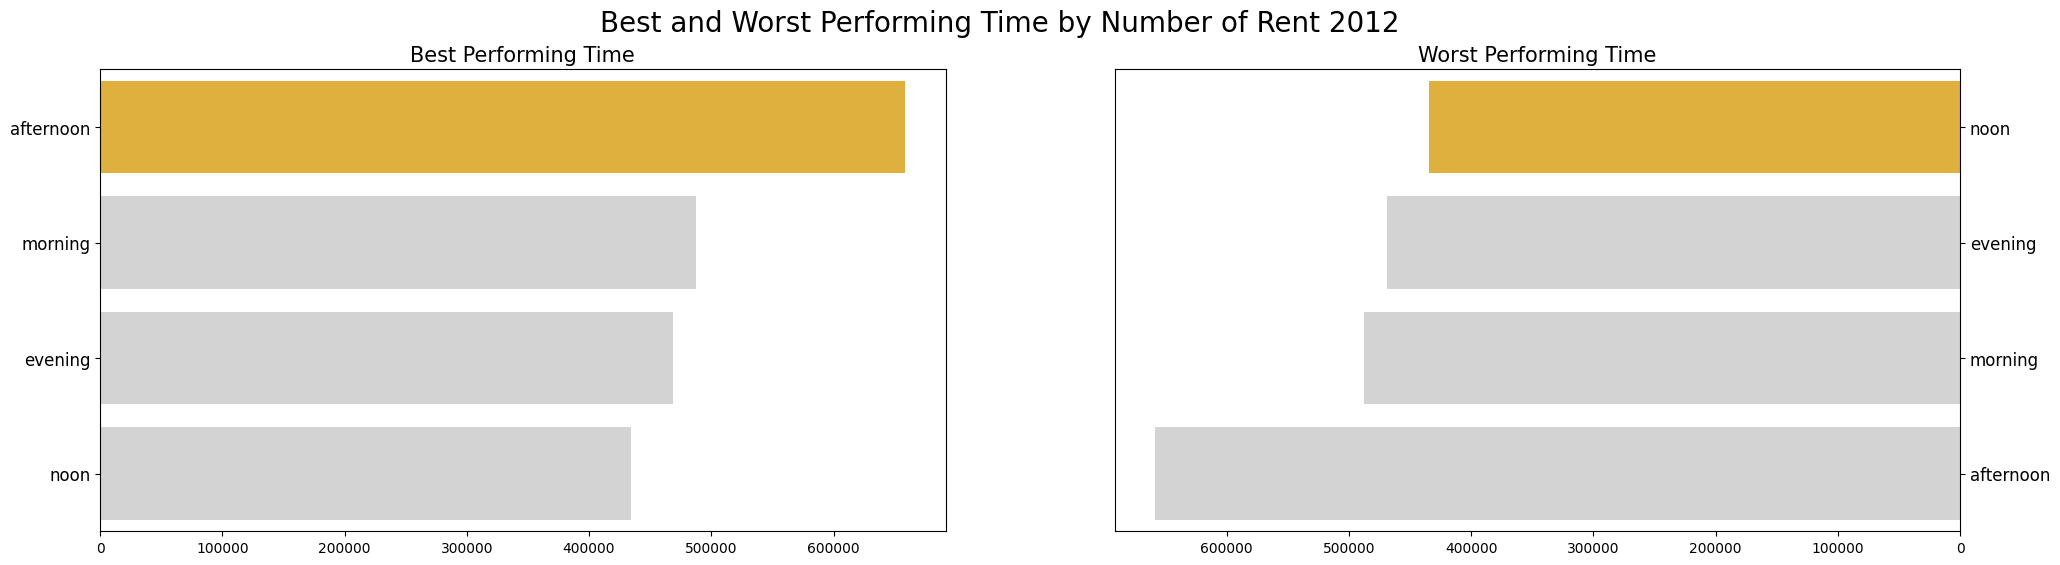

In [50]:
# Visualisasi data (2012)
colors = ["#FABB23", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

fix, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

sns.barplot(x="cnt", y="timeperiod", data=hourly_rent_df_2012.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Time", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="cnt", y="timeperiod", data=hourly_rent_df_2012.sort_values(by="cnt", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Time", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Time by Number of Rent 2012", fontsize=20)
plt.show()

## Conclusion

- **Conclution pertanyaan** 1: Baik pada tahun 2011 ataupun 2012, dari seluruh total peminjam sepeda rental ini, mayoritas
peminjam merupakan user yang telah ter-registered, pernyataan ini dapat kita anggap mutlak untuk seluruh keadaan karena
dapat dilihat juga gap (jarak) yang sangat jauh dari user casual dan registered. Dan juga kesimpulan utama pertanyaan 1 adalah pada tahun 2011 kenaikan peminjam sepeda terjadi dari bulan mei dan stagnan sampai bulan oktober sampai kemudian mengalami penurunan. Adapun pada Tahun 2012 kenaikan peminjam sepeda terjadi dari bulan maret sampai bulan oktober
- **Conclution pertanyaan 2**: Baik pada tahun 2011 ataupun 2012, peminjaman sepeda paling tinggi terjadi pada musim panas (summer) dan yang paling kecil yaitu pada musim dingin (winter). Hal ini selaras dengan visualisasi data pada pertanyaan 1 dimana pada bulan Januari - Februari dan November - Desember, performa peminjaman terlihat rendah karena pada waktu tersebut merupakan musim dingin
- **Conclution pertanyaan 3**: Baik pada tahun 2011 ataupun 2012, untuk peminjam yang ter-register, lebih sering menggunakan jasa peminjaman sepeda ini pada working days, dapat dikatakan bahwa memang sepeda ini digunakan untuk membantu keseharian mereka. Namun uniknya untuk pengguna casual (tidak ter-registrasi) lebih banyak menggunakan peminjaman sepeda ini pada hari libur (2011) ataupun sama (2012)
- **Conclution pertanyaan 4**: Secara keseluruhan operasional peminjaman sepeda ini selama 2 tahun, waktu terbaik dengan peminjaman paling banyak yaitu pada sore hari, dan waktu dengan peminjaman paling sedikit yaitu pada siang hari.

In [49]:
# menyimpan dataframe akhir hasil analisis
hour_df.to_csv("dashboard/new_hour.csv", index=False)